# Architecture Diagram

In [1]:
# !pip install diagrams

  Using cached diagrams-0.23.4-py3-none-any.whl.metadata (7.0 kB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
  Using cached MarkupSafe-2.1.5-cp39-cp39-macosx_10_9_universal2.whl.metadata (3.0 kB)
Using cached diagrams-0.23.4-py3-none-any.whl (24.6 MB)
Using cached Jinja2-3.1.3-py3-none-any.whl (133 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.3/208.3 kB 4.9 MB/s eta 0:00:00a 0:00:01
Using cached MarkupSafe-2.1.5-cp39-cp39-macosx_10_9_universal2.whl (18 kB)


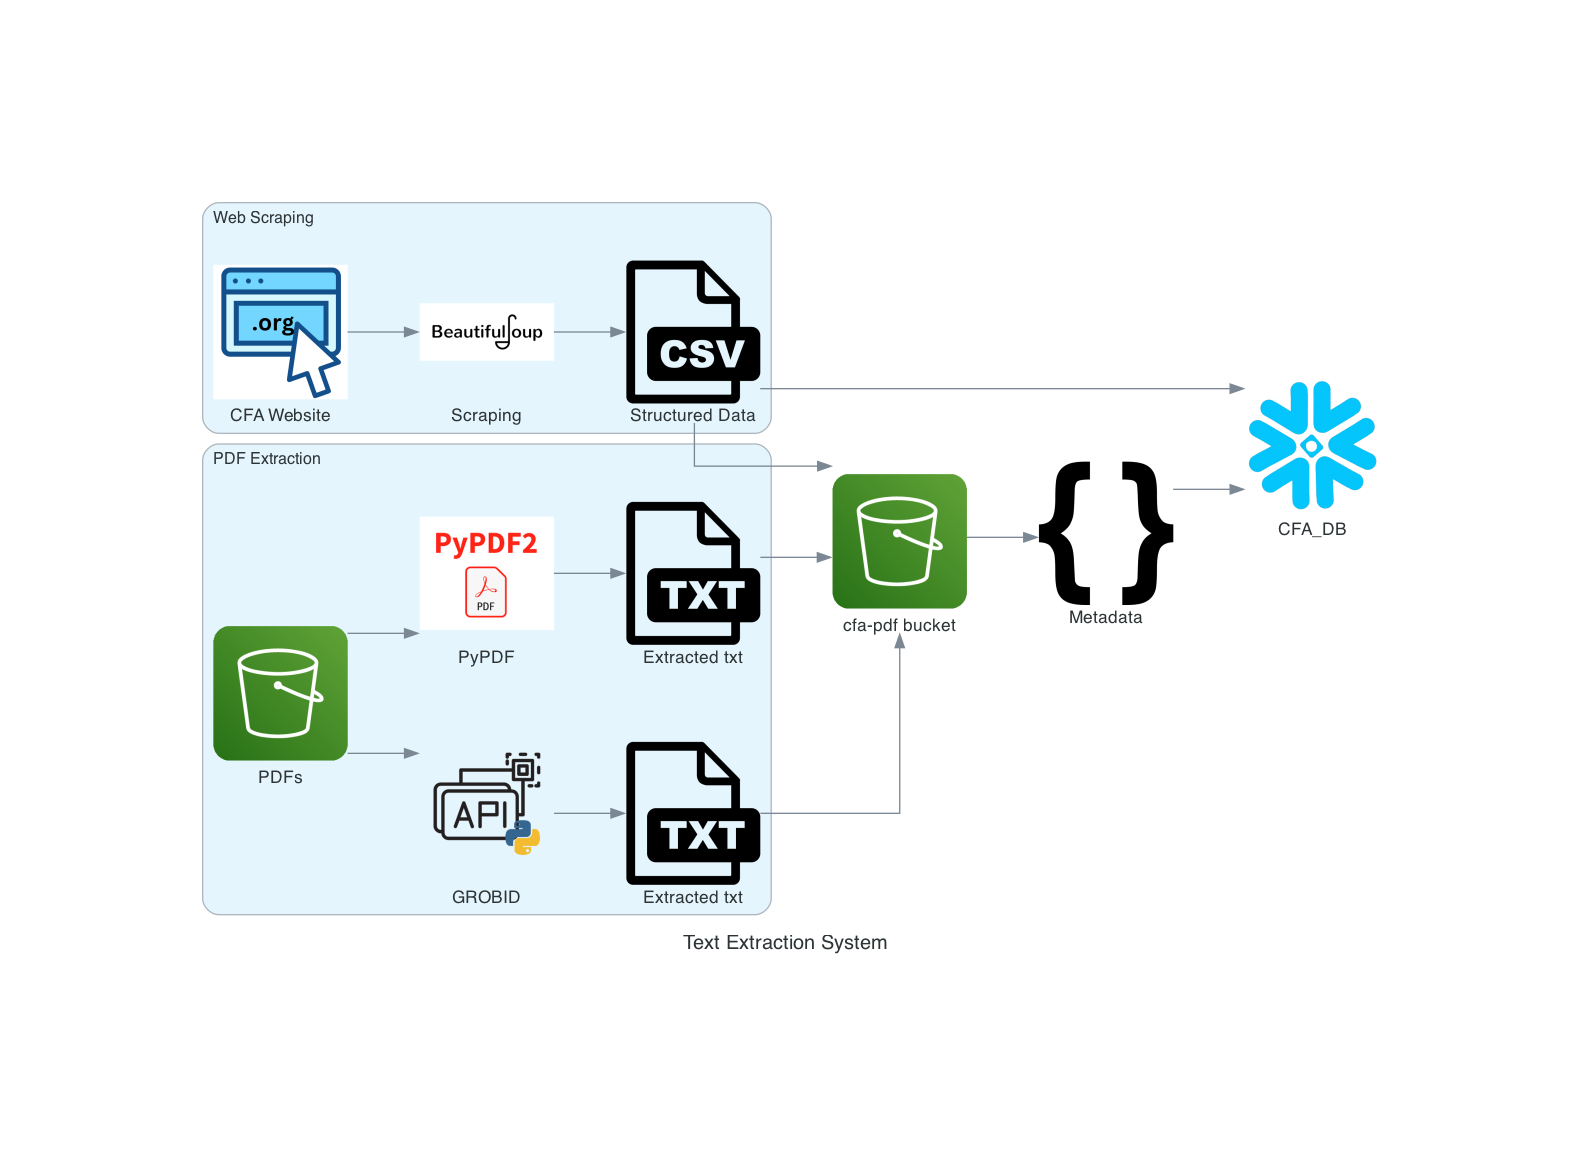

In [13]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS
from diagrams.programming.language import Python
from diagrams.aws.storage import S3 
from diagrams.saas.analytics import Snowflake
from diagrams.custom import Custom

with Diagram("Text Extraction System", show=False, direction="LR", filename="../sample_output/architecture") as diag:
    
    with Cluster("Web Scraping"):
        cfa = Custom("CFA Website", "../data/images/2.png")
        web_scraping = Custom("Scraping", "../data/images/soup.png")
        csv = Custom("Structured Data", "../data/images/csv-file-icon.png")
        cfa >> web_scraping >> csv
    
    with Cluster("PDF Extraction"):
        s3_local = S3("PDFs")
        grobid = Custom("GROBID", "../data/images/api.png")
        pypdf = Custom("PyPDF", "../data/images/pypdf.png")
        grobid_txt = Custom("Extracted txt", "../data/images/txt-file-icon.png")
        pypdf_txt = Custom("Extracted txt", "../data/images/txt-file-icon.png")
        s3_local >> grobid >> grobid_txt
        s3_local >> pypdf >> pypdf_txt
    
    s3_cfa = S3("cfa-pdf bucket")
    metadata = Custom("Metadata", "../data/images/brackets-coding-icon.png")
    snowflake = Snowflake("CFA_DB")
    
    csv >> s3_cfa
    grobid_txt >> s3_cfa
    pypdf_txt >> s3_cfa
    s3_cfa >> metadata >> snowflake
    csv >> snowflake

diag